<a href="https://colab.research.google.com/github/mohammedterry/NLP_for_ML/blob/master/NER.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
example_document = '''
Friday 9/11/2018
9th November 2018

Hey ho !
Can i have your contact details, please? 
aaha aaahhhh ah ahah ahahah ahh ahhahahaha hahaha hahahah
Sure. 
My email is mohammed@cognitionx.io and my phone number is 0743423453 0 01 012 1987 98 0.32 2.34 

The Matrix is a 1999 science fiction action film written and directed by The Wachowskis, starring Keanu Reeves, Laurence Fishburne, Carrie-Anne Moss, Hugo Weaving, and Joe Pantoliano.
'''

# NLTK

In [12]:
import nltk
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


True

In [0]:
def nltk_ner(document):
  return {(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(nltk.pos_tag(nltk.word_tokenize(document))) if hasattr(chunk, 'label') }

In [21]:
nltk_ner(example_document)

{('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORGANIZATION'),
 ('Wachowskis', 'ORGANIZATION')}

# Stanford Core NLP

In [6]:
!pip3 install stanfordnlp
import stanfordnlp
stanfordnlp.download('en')   
st = stanfordnlp.Pipeline()

    100% |████████████████████████████████| 143kB 9.9MB/s 
Using the default treebank "en_ewt" for language "en".
Would you like to download the models for: en_ewt now? (Y/n)
Y

Default download directory: /root/stanfordnlp_resources
Hit enter to continue or type an alternate directory.


Download location: /root/stanfordnlp_resources/en_ewt_models.zip


100%|██████████| 1.96G/1.96G [08:55<00:00, 3.78MB/s]



Download complete.  Models saved to: /root/stanfordnlp_resources/en_ewt_models.zip
Extracting models file for: en_ewt
Cleaning up...Done.
Use device: cpu
---
Loading: tokenize
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tokenizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: pos
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_tagger.pt', 'pretrain_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt.pretrain.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
---
Loading: lemma
With settings: 
{'model_path': '/root/stanfordnlp_resources/en_ewt_models/en_ewt_lemmatizer.pt', 'lang': 'en', 'shorthand': 'en_ewt', 'mode': 'predict'}
Building an attentional Seq2Seq model...
Using a Bi-LSTM encoder
Using soft attention for LSTM.
Finetune all embeddings.
[Running seq2seq lemmatizer with edit classifier]
---
Loading: depparse
With settings: 
{'model_path': '/root/stanfordnlp_resources

In [0]:
def stanford_pos(document):
  return [(word[1],word[4]) for sentence in st(document).conll_file.sents for word in sentence ]

def nltk_ner_stanford_pos(document):
  return {(' '.join(c[0] for c in chunk), chunk.label() ) for chunk in nltk.ne_chunk(stanford_pos(document)) if hasattr(chunk, 'label') } 

In [27]:
nltk_ner_stanford_pos(example_document)

{('Anne Moss', 'PERSON'),
 ('Carrie', 'PERSON'),
 ('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORGANIZATION'),
 ('Wachowskis', 'ORGANIZATION')}

# Spacy

In [28]:
!python3 -m spacy download en_core_web_lg
import spacy
sp = spacy.load('en_core_web_lg') 

    100% |████████████████████████████████| 852.3MB 57.6MB/s 
  Running setup.py install for en-core-web-lg ... done

    Linking successful
    /usr/local/lib/python3.6/dist-packages/en_core_web_lg -->
    /usr/local/lib/python3.6/dist-packages/spacy/data/en_core_web_lg

    You can now load the model via spacy.load('en_core_web_lg')



In [0]:
def spacy_ner(document):
  return {(ent.text.strip(), ent.label_) for ent in sp(document).ents}

In [31]:
spacy_ner(example_document)

{('', 'PERSON'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('2.34', 'TIME'),
 ('98 0.32', 'QUANTITY'),
 ('Carrie-Anne Moss', 'PERSON'),
 ('Friday 9/11/2018', 'DATE'),
 ('Hugo Weaving', 'ORG'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('Matrix', 'ORG'),
 ('November 2018', 'DATE'),
 ('Wachowskis', 'PERSON'),
 ('mohammed@cognitionx.io', 'PERSON')}

# Allen NLP

In [1]:
!pip3 install allennlp
from allennlp.predictors import Predictor
al = Predictor.from_path("https://s3-us-west-2.amazonaws.com/allennlp/models/fine-grained-ner-model-elmo-2018.12.21.tar.gz")

    100% |████████████████████████████████| 5.6MB 5.0MB/s 
    100% |████████████████████████████████| 552kB 26.0MB/s 
    100% |████████████████████████████████| 51kB 21.2MB/s 
    100% |████████████████████████████████| 122kB 31.6MB/s 
    100% |████████████████████████████████| 133kB 31.8MB/s 
    100% |████████████████████████████████| 4.5MB 7.8MB/s 
    100% |████████████████████████████████| 51kB 17.2MB/s 
    100% |████████████████████████████████| 512kB 959kB/s 
    100% |████████████████████████████████| 12.6MB 2.5MB/s 
    100% |████████████████████████████████| 1.5MB 18.1MB/s 
    100% |████████████████████████████████| 143kB 32.2MB/s 
    100% |████████████████████████████████| 61kB 21.9MB/s 
    100% |████████████████████████████████| 51kB 20.5MB/s 
    100% |████████████████████████████████| 2.3MB 13.2MB/s 
    100% |████████████████████████████████| 51kB 21.1MB/s 
    100% |████████████████████████████████| 204kB 23.9MB/s 
    100% |████████████████████████████████| 7.5M

Better speed can be achieved with apex installed from https://www.github.com/nvidia/apex.


100%|██████████| 724601837/724601837 [00:13<00:00, 51888450.01B/s]
/usr/local/lib/python3.6/dist-packages/allennlp/data/token_indexers/token_characters_indexer.py:51: UserWarning: You are using the default value (0) of `min_padding_length`, which can cause some subtle bugs (more info see https://github.com/allenai/allennlp/issues/1954). Strongly recommend to set a value, usually the maximum size of the convolutional layer size when using CnnEncoder.
  UserWarning)


In [0]:
def convert_results(allen_results):
  ents = set()
  for word, tag in zip(allen_results["words"], allen_results["tags"]):
    if tag != "O":
      ent_position, ent_type = tag.split("-")
      if ent_position == "U":
        ents.add((word,ent_type))
      else:
        if ent_position == "B":
          w = word
        elif ent_position == "I":
          w += " " + word
        elif ent_position == "L":
          w += " " + word
          ents.add((w,ent_type))
  return ents

def allennlp_ner(document):
  return convert_results(al.predict(sentence=document))

In [5]:
allennlp_ner(example_document)

{('0.32 2.34', 'CARDINAL'),
 ('1987', 'DATE'),
 ('1999', 'DATE'),
 ('Carrie - Anne Moss', 'PERSON'),
 ('Friday 9/11/2018 9th November 2018', 'DATE'),
 ('Hugo Weaving', 'PERSON'),
 ('Joe Pantoliano', 'PERSON'),
 ('Keanu Reeves', 'PERSON'),
 ('Laurence Fishburne', 'PERSON'),
 ('The Matrix', 'WORK_OF_ART'),
 ('The Wachowskis', 'PERSON')}

# Polyglot

In [32]:
!pip3 install -U git+https://github.com/aboSamoor/polyglot.git@master
!polyglot download embeddings2.en ner2.en
from polyglot.text import Text

  Cloning https://github.com/aboSamoor/polyglot.git (to revision master) to /tmp/pip-req-build-ic84qxrt
    100% |████████████████████████████████| 14.3MB 2.4MB/s 
    100% |████████████████████████████████| 215kB 25.2MB/s 
  Stored in directory: /tmp/pip-ephem-wheel-cache-7mqzlz5r/wheels/42/d9/73/345c7ae8554299ff8b31635d64eb8455fd591385fa734cdbef
  Stored in directory: /root/.cache/pip/wheels/7b/44/44/ec4c5e25e095f02aa0e63ef2bf0cc8badda5877330ffa5fbe4
  Stored in directory: /root/.cache/pip/wheels/ed/73/e3/0621953e0e442f0333daa1dd6523bec36606ee33f75612923a
  Stored in directory: /root/.cache/pip/wheels/43/74/e2/92a807d8662f5a0df908ba20887f8ad02bf1b130d3939b65b7
  Stored in directory: /root/.cache/pip/wheels/f3/f9/c7/4fbf1faa6038faf183f6e3ea61f17a5f7eea5ab9a1dd7753fd
Successfully built polyglot pycld2 PyICU morfessor futures


In [0]:
def polyglot_ner(document):
  return {(' '.join(entity),entity.tag.split('-')[-1]) for entity in Text(document).entities}

In [93]:
polyglot_ner(example_document)

{('Anne Moss', 'PER'),
 ('Carrie', 'PER'),
 ('Hugo Weaving', 'PER'),
 ('Joe Pantoliano', 'PER'),
 ('Keanu Reeves', 'PER'),
 ('Laurence Fishburne', 'PER'),
 ('cognitionx.io', 'PER'),
 ('mohammed', 'PER')}

# Which is the Best?

In [0]:
test = {
  "text":'''Elizabeth was born in London as the first child of the Duke and Duchess of York, later King George VI and Queen Elizabeth, and she was educated privately at home. Her father acceded to the throne on the abdication of his brother King Edward VIII in 1936''',
  "entities" : {
    "dates":{"1936"},
    "locations":{"London", "York"},
    "people":{
        "Elizabeth",
        "Duke",
        "Duchess",
        "King George VI",
        "Queen Elizabeth",
        "King Edward VIII",
    },
  }
}

## Which is the quickest?

In [99]:
import time

nltk_start = time.time()
Y_nltk = nltk_ner(test["text"])
nltk_end = time.time()
nltk_time = nltk_end - nltk_start
print(f"NLTK = {nltk_time}s")

stanford_start = time.time()
Y_stanford = nltk_ner_stanford_pos(test["text"])
stanford_end = time.time()
stanford_time = stanford_end - stanford_start
print(f"Stanford Core NLP = {stanford_time}s")

spacy_start = time.time()
Y_spacy = spacy_ner(test["text"])
spacy_end = time.time()
spacy_time = spacy_end - spacy_start
print(f"Spacy = {spacy_time}s")

allen_start = time.time()
Y_allen = allennlp_ner(test["text"])
allen_end = time.time()
allen_time = allen_end - allen_start
print(f"Allen NLP = {allen_time}s")

poly_start = time.time()
Y_polyglot = polyglot_ner(test["text"])
poly_end = time.time()
poly_time = poly_end - poly_start
print(f"Polyglot = {poly_time}s")

NLTK = 0.06936120986938477s
Stanford Core NLP = 0.6915454864501953s
Spacy = 0.033310890197753906s
Allen NLP = 3.0711562633514404s
Polyglot = 0.006740570068359375s


Text(0.5, 1.0, 'How long does each NER take?')

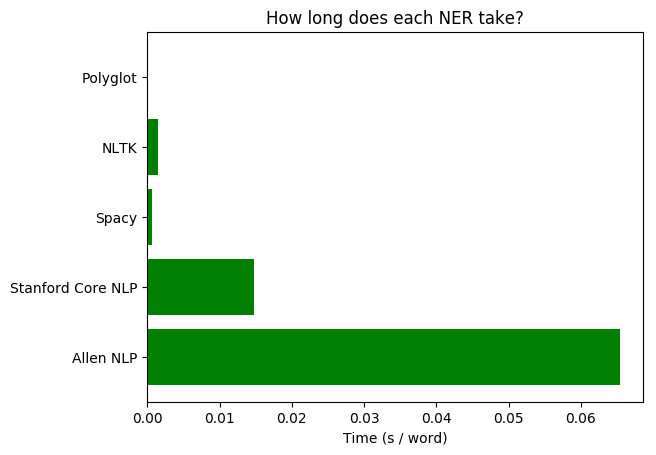

In [100]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

n_words = len(X.split())
ners = ('Polyglot', 'NLTK', 'Spacy', 'Stanford Core NLP', 'Allen NLP')
performance = [poly_time/n_words, nltk_time/n_words, spacy_time/n_words, stanford_time/n_words, allen_time/n_words]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='green', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('Time (s / word)')
ax.set_title('How long does each NER take?')

## Which is the best NER for finding entities?

In [0]:
def f1_score(Y, Y_hat, strict=False):
  e = .000001
  non_entities = {}
  true_positives = sum([max([1 if y == y_hat else .5 if y in y_hat else 0 for y_hat in Y_hat]+ [0]) for y in Y]) # correctly identified
  if strict: true_positives = len(Y.intersection(Y_hat)) #if strict, only count exact entity matches and not partial matches (default)
  dY = Y ^ Y_hat 
  false_positives = len(Y_hat.intersection(dY)) # incorrectly identified
  false_negatives = len(Y) - true_positives # incorrectly rejected
  recall = true_positives / (true_positives + false_negatives + e)
  precision = true_positives / (true_positives + false_positives + e)
  return (2 * precision * recall) / (precision + recall + e)

In [164]:
expected_entities = {entity for entities in test["entities"].values() for entity in entities}
polyglot_entities = {entity for entity,_ in Y_polyglot}
spacy_entities = {entity for entity,_ in Y_spacy}
nltk_entities = {entity for entity,_ in Y_nltk}
stanford_entities = {entity for entity,_ in Y_stanford}
allen_entities = {entity for entity,_ in Y_allen}

print(f"Expected = 100.0%\n\t{sorted(expected_entities)}\n")
f1_poly = f1_score(expected_entities, polyglot_entities)
print(f"Polyglot = {f1_poly*100}%\n\t{sorted(polyglot_entities)}\n")
f1_spacy = f1_score(expected_entities, spacy_entities)
print(f"Spacy = {f1_spacy*100}%\n\t{sorted(spacy_entities)}\n")
f1_nltk = f1_score(expected_entities, nltk_entities)
print(f"NLTK = {f1_nltk*100}%\n\t{sorted(nltk_entities)}\n")
f1_stanford = f1_score(expected_entities, stanford_entities)
print(f"Stanford Core NLP = {f1_stanford*100}%\n\t{sorted(stanford_entities)}\n")
f1_allen = f1_score(expected_entities, allen_entities)
print(f"Allen NLP = {f1_allen*100}%\n\t{sorted(allen_entities)}\n")

Expected = 100.0%
	['1936', 'Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Polyglot = 94.1175861591972%
	['Duchess', 'Duke', 'Elizabeth', 'King Edward VIII', 'King George VI', 'London', 'Queen Elizabeth', 'York']

Spacy = 62.49994296878953%
	['1936', 'Elizabeth', 'George VI', 'King Edward VIII', 'London', 'Queen Elizabeth', 'first']

NLTK = 58.823472664402864%
	['Duchess of York', 'Duke', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'Queen Elizabeth']

Stanford Core NLP = 58.823472664402864%
	['Duchess of York', 'Duke', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'Queen Elizabeth']

Allen NLP = 47.05876816614334%
	['1936', 'Duchess of York', 'Edward VIII', 'Elizabeth', 'George VI', 'London', 'first']



Text(0.5, 1.0, 'How good is each NER at detecting entities?')

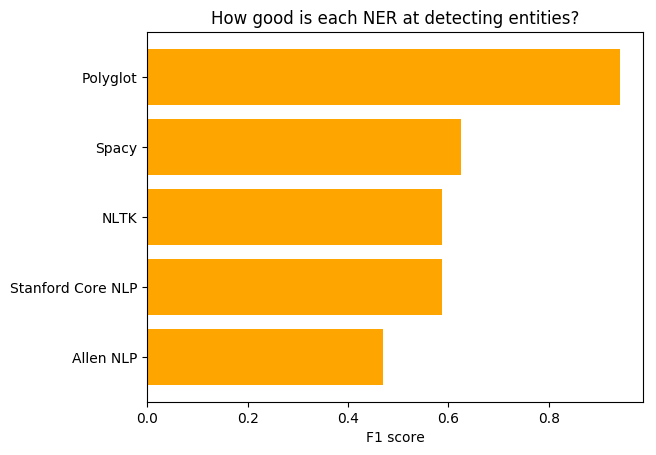

In [139]:
import matplotlib.pyplot as plt
import numpy as np

plt.rcdefaults()
fig, ax = plt.subplots()

n_words = len(X.split())
ners = ('Polyglot', 'Spacy', 'NLTK', 'Stanford Core NLP', 'Allen NLP')
performance = [f1_poly, f1_spacy, f1_nltk, f1_stanford, f1_allen]
y_pos = np.arange(len(ners))

ax.barh(y_pos, performance, align='center', color='orange', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(ners)
ax.invert_yaxis()  
ax.set_xlabel('F1 score')
ax.set_title('How good is each NER at detecting entities?')

## Which is the best NER for correctly labelling entities?

In [173]:
polyglot_people = {entity for entity,tag in Y_polyglot if tag == "PER"}
spacy_people = {entity for entity,tag in Y_spacy if tag == "PERSON"}
nltk_people = {entity for entity,tag in Y_nltk if tag == "PERSON"}
stanford_people = {entity for entity,tag in Y_stanford if tag == "PERSON"}
allen_people = {entity for entity,tag in Y_allen if tag == "PERSON"}

polyglot_dates = {entity for entity,tag in Y_polyglot if tag == "DATE"}
spacy_dates = {entity for entity,tag in Y_spacy if tag == "DATE"}
nltk_dates = {entity for entity,tag in Y_nltk if tag == "DATE"}
stanford_dates = {entity for entity,tag in Y_stanford if tag == "DATE"}
allen_dates = {entity for entity,tag in Y_allen if tag == "DATE"}

polyglot_locations = {entity for entity,tag in Y_polyglot if tag == "LOC"}
spacy_locations = {entity for entity,tag in Y_spacy if tag == "GPE"}
nltk_locations = {entity for entity,tag in Y_nltk if tag == "GPE"}
stanford_locations = {entity for entity,tag in Y_stanford if tag == "GPE"}
allen_locations = {entity for entity,tag in Y_allen if tag == "GPE"}

f1_poly_ppl = f1_score(test["entities"]["people"], polyglot_people)
f1_poly_dts = f1_score(test["entities"]["dates"], polyglot_dates)
f1_poly_loc = f1_score(test["entities"]["locations"], polyglot_locations)
print(f"Polyglot \n\tPeople =\t{f1_poly_ppl*100}%\t{polyglot_people}\n\tLocations =\t{f1_poly_loc*100}%\t{polyglot_locations}\n\tDates =\t\t{f1_poly_dts*100}%\t{polyglot_dates}\n\n")
f1_spacy_ppl = f1_score(test["entities"]["people"], spacy_people)
f1_spacy_dts = f1_score(test["entities"]["dates"], spacy_dates)
f1_spacy_loc = f1_score(test["entities"]["locations"], spacy_locations)
print(f"Spacy \n\tPeople =\t{f1_spacy_ppl*100}%\t{spacy_people}\n\tLocations =\t{f1_spacy_loc*100}%\t{spacy_locations}\n\tDates =\t\t{f1_spacy_dts*100}%\t{spacy_dates}\n\n")
f1_nltk_ppl = f1_score(test["entities"]["people"], nltk_people)
f1_nltk_dts = f1_score(test["entities"]["dates"], nltk_dates)
f1_nltk_loc = f1_score(test["entities"]["locations"], nltk_locations)
print(f"NLTK \n\tPeople =\t{f1_nltk_ppl*100}%\t{nltk_people}\n\tLocations =\t{f1_nltk_loc*100}%\t{nltk_locations}\n\tDates =\t\t{f1_nltk_dts*100}%\t{nltk_dates}\n\n")
f1_stanford_ppl = f1_score(test["entities"]["people"], stanford_people)
f1_stanford_dts = f1_score(test["entities"]["dates"], stanford_dates)
f1_stanford_loc = f1_score(test["entities"]["locations"], stanford_locations)
print(f"Stanford Core NLP \n\tPeople =\t{f1_stanford_ppl*100}%\t{stanford_people}\n\tLocations =\t{f1_stanford_loc*100}%\t{stanford_locations}\n\tDates =\t\t{f1_stanford_dts*100}%\t{stanford_dates}\n\n")
f1_allen_ppl = f1_score(test["entities"]["people"], allen_people)
f1_allen_dts = f1_score(test["entities"]["dates"], allen_dates)
f1_allen_loc = f1_score(test["entities"]["locations"], allen_locations)
print(f"Allen NLP \n\tPeople =\t{f1_allen_ppl*100}%\t{allen_people}\n\tLocations =\t{f1_allen_loc*100}%\t{allen_locations}\n\tDates =\t\t{f1_allen_dts*100}%\t{allen_dates}\n\n")

Polyglot 
	People =	92.30762840239572%	{'King George VI', 'York', 'Elizabeth', 'Queen Elizabeth', 'Duchess', 'Duke', 'King Edward VIII'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Spacy 
	People =	59.999940000040006%	{'George VI', 'Elizabeth', 'Queen Elizabeth', 'King Edward VIII'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		99.99985000012501%	{'1936'}


NLTK 
	People =	39.9999440000584%	{'Edward VIII', 'George VI', 'Elizabeth', 'Queen Elizabeth'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Stanford Core NLP 
	People =	39.9999440000584%	{'Edward VIII', 'George VI', 'Elizabeth', 'Queen Elizabeth'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		0.0%	set()


Allen NLP 
	People =	28.57137414974447%	{'Duchess of York', 'Edward VIII', 'George VI', 'Elizabeth'}
	Locations =	66.66657777782964%	{'London'}
	Dates =		99.99985000012501%	{'1936'}




/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:1468: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data[hue_mask])


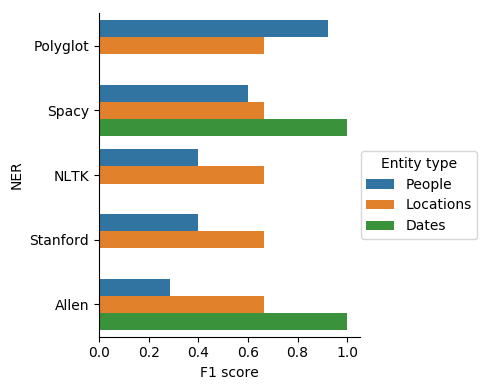

In [187]:
import pandas as pd

df = pd.DataFrame({
    "NER":["Polyglot","Spacy","NLTK","Stanford","Allen"] *3,
    "Entity type":["People"] *5 + ["Locations"] *5 + ["Dates"]*5,
    "F1 score":[f1_poly_ppl, f1_spacy_ppl, f1_nltk_ppl, f1_stanford_ppl, f1_allen_ppl, f1_poly_loc, f1_spacy_loc, f1_nltk_loc, f1_stanford_loc, f1_allen_loc, f1_poly_dts, f1_spacy_dts, f1_nltk_dts, f1_stanford_dts, f1_allen_dts],
})


import seaborn as sns
sns.factorplot(x='F1 score',y='NER', hue='Entity type', data=df, kind='bar')